
# Project: Investigate a Dataset (Tmdb-movies data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties
## 1.This Dataset has 21 columns.
## 2.The rows are from 0 to 10866
## 3.Nulls and duplicates are also present


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv') #load dataset into dataframe of df
df.head() #show first 5 rows of dataset


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape #shows number of rows and columns in dataframe

(10866, 21)

In [4]:
df.info() #show information about columns in dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Duplicate values are identified.

In [5]:
sum(df.duplicated()) #show number of duplicated value in dataset

1


### Data Cleaning 
## 1.There are 9 columns namely imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies which are replaced by approproate strings.
## 2.There is one duplicate value which should be dropped.
## 3. Datatype of release_data is changed from object to datetime.

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
imdb_id = "no imdb_id" #no imdb_id string is stored in variable imdb_id
df['imdb_id'].fillna(imdb_id,inplace=True) #it will replace the null value of imdb_id column into no imbd_id string value
cast = "no cast" #no cast string is stored in variable cast
df['cast'].fillna(cast,inplace=True) #it will replace null value of cast column into no cast string value
homepage = "no homepage" #no homepage string is stored in variable homepage
df['homepage'].fillna(homepage,inplace=True) #it will replace null value of homepage column into no homepage string value
director = "unknown director" #unknown director string is stored in variable director
df['director'].fillna(director,inplace=True)#it will replace null value of director column into unknown director string value
tagline = "no tagline" #no tagline string is stored in variable tagline
df['tagline'].fillna(tagline,inplace=True)#it will replace null value of tagline column into no tagline string value
keywords = "no keywords" #no keywords string is stored in variable keywords
df['keywords'].fillna(keywords,inplace=True)#it will replace null value of keyword column into no keywords string value
overview = "no overview" #no overview string is stored in variable overview
df['overview'].fillna(overview,inplace=True)#it will replace null value of overview column into no overview string value
genres = "no genres" #no genres string is stored in variable no_genres
df['genres'].fillna(genres,inplace=True)#it will replace null value of genres column into no genres string value
production_companies = "no production_companies" #no production_companies string is stored in variable production_companies.
df['production_companies'].fillna(production_companies,inplace=True)#it will replace null value of production_companies column into no production_companies string value

In [7]:
df.drop_duplicates(inplace=True) #duplicate values rows are dropped
sum(df.duplicated())

0

In [8]:
df['release_date'] = pd.to_datetime(df['release_date']) #convert datatype of release_date from strings into datetime.

In [9]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
list_genre = list(set(df['genres'].str.split('|').str[0])) #splits genres column strings when it finds '|' and returns a list of genres
list_genre #display list_genre

['Drama',
 'Music',
 'Adventure',
 'Horror',
 'TV Movie',
 'Thriller',
 'Western',
 'Fantasy',
 'Animation',
 'Foreign',
 'Action',
 'War',
 'Mystery',
 'Science Fiction',
 'Crime',
 'Family',
 'Romance',
 'History',
 'Documentary',
 'no genres',
 'Comedy']

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which genres are most popular from year to year? )

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
for loc,movie in df.iterrows(): #iterate rows in dataframe
    for genre in list_genre: #iterate list of genres as list_genre
        df.loc[loc,genre] = genre in movie['genres'] #genre return index which is stored in loc.

In [12]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,War,Mystery,Science Fiction,Crime,Family,Romance,History,Documentary,no genres,Comedy
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,False,False,True,False,False,False,False,False,False,False
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,False,False,True,False,False,False,False,False,False,False
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,False,False,True,False,False,False,False,False,False,False
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,False,False,True,False,False,False,False,False,False,False
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,False,False,False,True,False,False,False,False,False,False


## Calculate yearwise_genres

In [13]:
#calculate yearwise_genres
genre_list = list(list_genre)
yearwise_genres = pd.Series(index = list_genre)
for genre in genre_list:
    num = df[genre].sum();
    yearwise_genres[genre] = num

## Calculating and plotting movies per genres from year to year.

Text(0.5,1,'movies per genres')

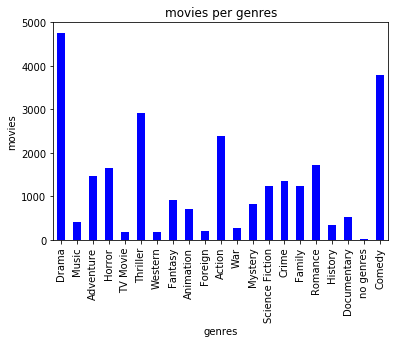

In [14]:
yearwise_genres.plot(kind='bar', color='b') #plot bar graph of yearwise_genres
plt.xlabel("genres") #give names to x axis
plt.ylabel("movies") #give names to y axis
plt.title("movies per genres") #give title to graph.

## This graph shows the frequency of movies per genres.
## The purpose of this graph is to find the highest frequency(yearwise_genres) of movies per genres i.e Drama, comedy and thriller

## Calculate percenage_genres

In [15]:
#calculate percentage_genres
percentage_genres = pd.Series(index = list_genre) 
for genre in genre_list:
    num = df[genre].sum();
    percentage_genres[genre] = num/float(df[genre].count())*100

## Calculate and plot relative frequency of movies per genres

Text(0.5,1,'relative frequency of movies per genres')

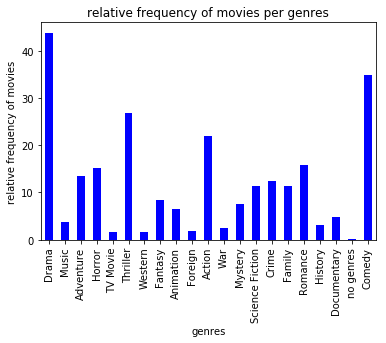

In [16]:
percentage_genres.plot(kind = 'bar',color='b') #plot bar graph of percentage_genres
plt.xlabel("genres") #give names to x axis
plt.ylabel("relative frequency of movies") #give names to y axis
plt.title("relative frequency of movies per genres")#give title to graph.

## This graph shows the relative frequency of movies per genres.
## The purpose of this graph is to find the highest relative frequency of movies per genres i.e Drama, comedy and thriller

### OBSERVATION:-

## 1. In Plot 1 shows we observe that Drama, Comedy and Thriller are most popular from year to year.
## 2. In plot 2 we observe that Drama, Comedy and Triller are highest relative frequency of movies per year.

### Research Question 2  (In which season most highest revenue)

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['month'] = pd.DatetimeIndex(df['release_date']).month #extract month from release date and create a new column months

In [18]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Mystery,Science Fiction,Crime,Family,Romance,History,Documentary,no genres,Comedy,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,False,True,False,False,False,False,False,False,False,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,False,True,False,False,False,False,False,False,False,5


In [19]:
bin_edge=[0,3,6,9,12] #bin_edge cut data in groups.
bin_names=['winter','summer','rainy','autumn'] #assign bin_names
df['season'] = pd.cut(df['month'],bin_edge, labels=bin_names) #create season column
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Science Fiction,Crime,Family,Romance,History,Documentary,no genres,Comedy,month,season
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,True,False,False,False,False,False,False,False,6,summer
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,True,False,False,False,False,False,False,False,5,summer
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,True,False,False,False,False,False,False,False,3,winter
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,True,False,False,False,False,False,False,False,12,autumn
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,False,True,False,False,False,False,False,False,4,summer


In [20]:
df_season = df.groupby('season')['revenue'].mean() #groupby seasons and revenue
df_season.head()

season
winter    2.638043e+07
summer    5.692919e+07
rainy     3.169012e+07
autumn    4.521065e+07
Name: revenue, dtype: float64

## Plotting revenue for each season.

Text(0.5,1,'revenue for each season')

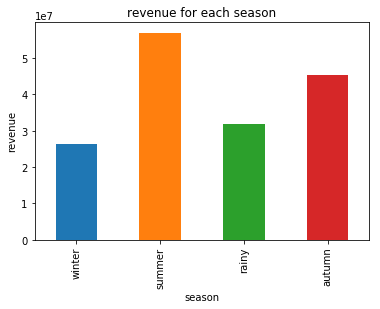

In [21]:
df_season.plot(kind='bar') #plot bar graph
plt.xlabel("season") #give name to x axis
plt.ylabel("revenue") #given name to y axis
plt.title("revenue for each season") #give title to graph

## The purpose of this bar graph is to shows which season has highest revenue.
## From this we get that summer season has highest revenue.

## Plotting revenue for each season

Text(0.5,1,'revenue for each season')

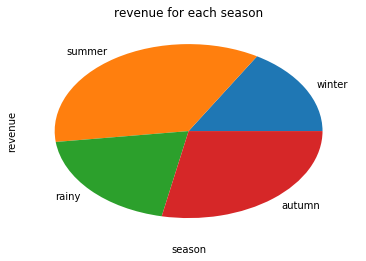

In [22]:
df_season.plot(kind='pie')#plot pie chart
plt.xlabel("season") #give name to x axis
plt.ylabel("revenue")#given name to y axis
plt.title("revenue for each season") #give title to graph

## The purpose of this pie chart is to shows which season has highest revenue.
## From this we get that summer season has highest revenue and second highest is autumn.

### Observations:-
## we make 2 type of plots bar graph as well as pie chart both observe that
## summer is the main season in which movies make most revenue on average.
## The second highest season is autumn. 

<a id='conclusions'></a>
## Conclusions
## Initially there are 21 columns in dataset and rows are from 0 to 10866.
## Nulls and duplicates are also present initially.
## There are 9 columns namely imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies which are replaced by approproate strings.
## There is one duplicate value which should be dropped.
## Datatype of release_data is changed from object to datetime.
## These all are in Data Wrangling Phase.

## Now in Exploratory Data Analysis phase 2 questions are answered.

## Q1: Which genres are most popular from year to year?
##       In this we find yearwise_genres which conclude that Drama, Comedy and Thriller are most popular from year to year.
##       In this we also calculate percentage_genres which conclude that Drama, Comedy and Triller are highest relative frequency of movies per year.

## Q2: In which season most highest revenue
##        In  this we seperate months from release_date column and make a column of months, then create a column season in which 4 seasons are assign to bin_names.
## we conclude from bar graph and pie charts that
 ## season
   ## winter    2.638043e+07
   ## summer    5.692919e+07
   ## rainy     3.169012e+07
   ## autumn    4.521065e+07
## summer is the season with highest revenue.and autumn is the second highest season with highest revenue.

## Limitations:-
## This analysis may not predict coming years trends i.e the highest revenue will be in summer season. The predictions are changed according to data.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295